Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

Linear Regression MSE: 265179693.2067201
Ridge Regression MSE: 328712352.13342017


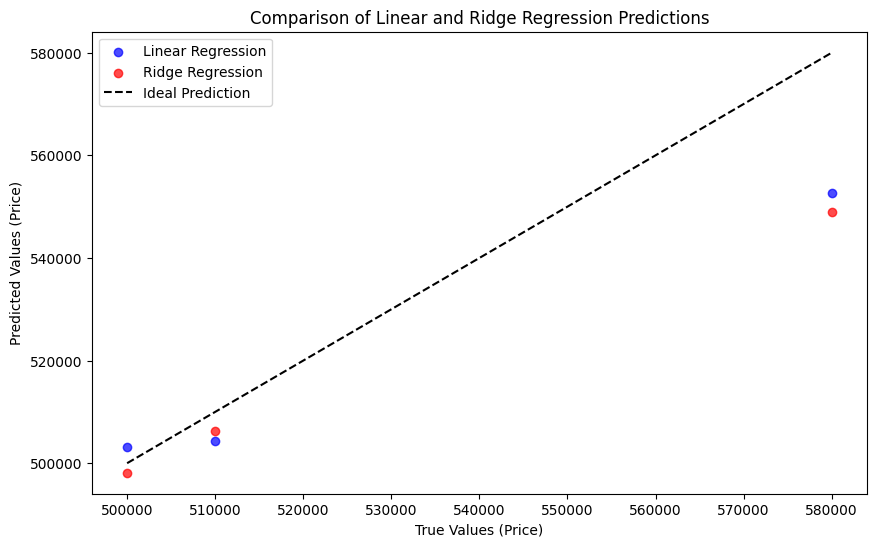

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

# Sample dataset with multicollinearity: Predicting house prices with square footage and number of rooms
data = {
    'Square_Feet': [1500, 1800, 2500, 2200, 2000, 2100, 1800, 2100, 1900, 2500],
        'Num_Rooms': [3, 4, 3, 4, 3, 4, 3, 4, 3, 4],
            'Price': [400000, 500000, 600000, 550000, 520000, 580000, 530000, 590000, 510000, 600000]
            }


# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Features (input variables) and target (house price)
X = df[['Square_Feet', 'Num_Rooms']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Ridge Regression Model with alpha=1 (L2 Regularization)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Compare the Mean Squared Error (MSE) between Linear Regression and Ridge Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Results
print("Linear Regression MSE:", mse_linear)
print("Ridge Regression MSE:", mse_ridge)

# Visualize the comparison of predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal Prediction')
plt.title('Comparison of Linear and Ridge Regression Predictions')
plt.xlabel('True Values (Price)')
plt.ylabel('Predicted Values (Price)')
plt.legend()
plt.show()

Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

Lasso Regression MSE: 0.9654990368340859
Lasso Regression Coefficients: [-0. -0.  0.  0. -0.]


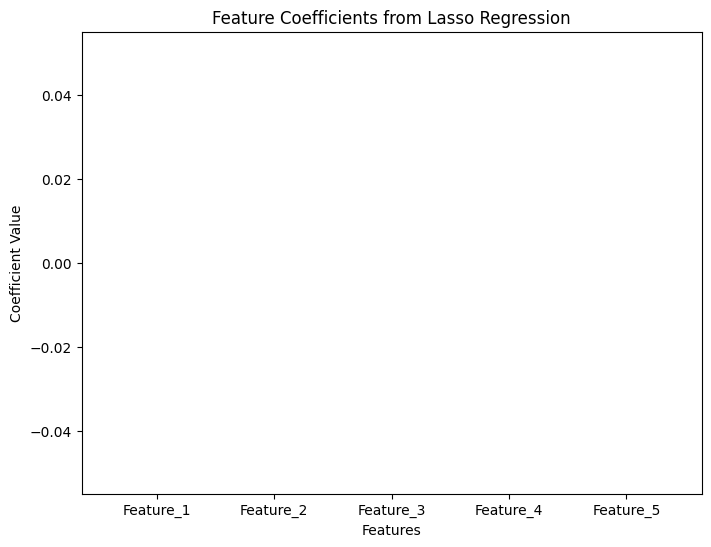

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Task 2: Implement Lasso regression and observe effect on feature selection in feature-rich data.

# Sample dataset with multiple features
data = {
    'Feature_1': np.random.randn(100),
        'Feature_2': np.random.randn(100),
            'Feature_3': np.random.randn(100),
                'Feature_4': np.random.randn(100),
                    'Feature_5': np.random.randn(100),
                        'Target': np.random.randn(100)
                        }

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Features (input variables) and target (output variable)
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso Regression Model (with L1 Regularization)
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Display results
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression Coefficients:", lasso_model.coef_)

# Visualizing the feature selection effect
plt.figure(figsize=(8, 6))
plt.bar(X.columns, lasso_model.coef_, color='blue')
plt.title('Feature Coefficients from Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()




Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

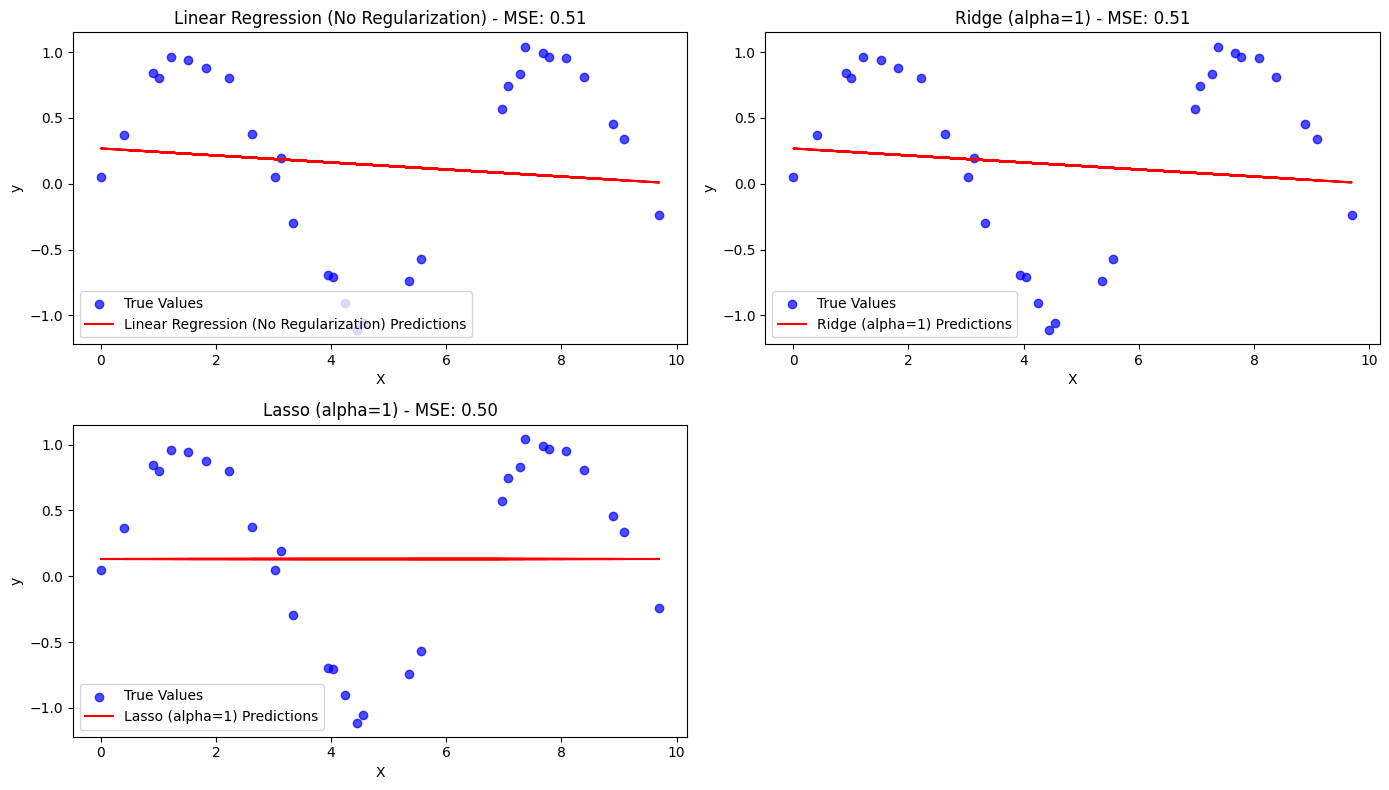

MSE Comparison:
Linear Regression (No Regularization): 0.51
Ridge (alpha=1): 0.51
Lasso (alpha=1): 0.50


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

# Generate synthetic data with a non-linear relationship (to simulate model complexity)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding noise to simulate real-world data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models with different regularization
alpha_values = [0, 0.1, 1, 10]  # Different regularization strengths for Ridge and Lasso
models = {
    "Linear Regression (No Regularization)": LinearRegression(),
        "Ridge (alpha=1)": Ridge(alpha=1),
            "Lasso (alpha=1)": Lasso(alpha=1)
            }

# Store the performance (MSE) for each model
mse_values = {}

# Plot for model complexity
plt.figure(figsize=(14, 8))

# Iterate over models to fit and plot
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values[model_name] = mse
                    
    # Plotting predictions vs actual values
    plt.subplot(2, 2, list(models.keys()).index(model_name) + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', alpha=0.7)
    plt.plot(X_test, y_pred, color='red', label=f'{model_name} Predictions')
    plt.title(f'{model_name} - MSE: {mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

# Show the comparison of performance metrics (MSE)
plt.tight_layout()
plt.show()

# Print the Mean Squared Error (MSE) for each model
print("MSE Comparison:")
for model_name, mse in mse_values.items():
    print(f"{model_name}: {mse:.2f}")